# Análise exploratória dos atributos categóricos

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
np.random.seed(777)

df = pd.read_csv('../data/students.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [20]:
nominal = ['Marital status', 
            'Application mode', 
            'Course',
            'Daytime/evening attendance', 
            'Previous qualification', 
            'Nacionality',
            'Mother\'s qualification', 
            'Father\'s qualification',
            'Mother\'s occupation', 
            'Father\'s occupation', 
            'Displaced',
            'Educational special needs', 
            'Debtor', 
            'Tuition fees up to date',
            'Gender', 
            'Scholarship holder', 
            'International',]        

ordinais = ['Application order']  

## Nominais

In [21]:
X_n = X[nominal]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, train_size=0.8, stratify=y, random_state=777)

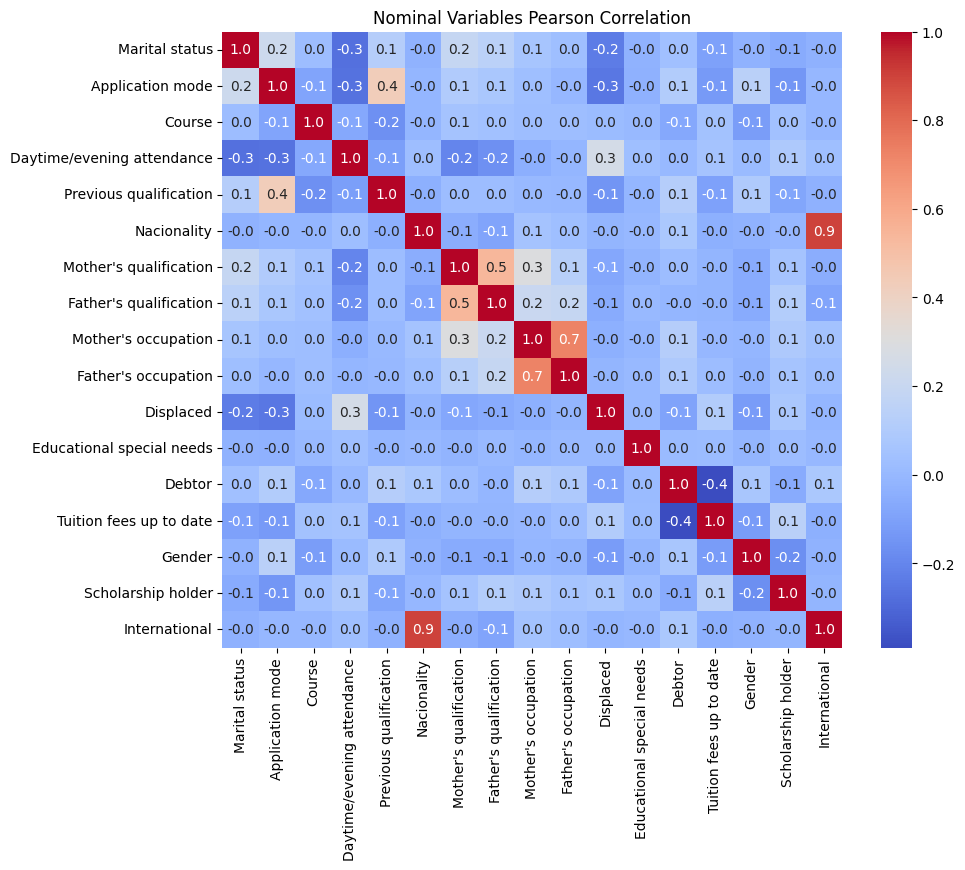

In [23]:
peason_corr = X_train.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()